In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV,ElasticNet,ElasticNetCV
from sklearn import metrics
from math import sqrt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


# 1. Data Overview

## 1.1 Read data

In [2]:
import pandas as pd
df = pd.read_csv('/kaggle/input/bike-sharing-demand/train.csv')
pd.set_option('display.max_rows',20)
df

datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000       3          13     16  
1      13.635        80     0.0000       8          32     40  
2      13.635        80     0.0000       5          27     32  
3      14.395        75     0.0000       3          10     13  
4      14.395        75     0.0000       0           1      1  
...       ...       ...        ...     ...         ...    ...  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88  

[10886 rows x 12 columns]

From the above, it can be seen that the data dimension is 10886 rows and 12 columns. Except for the first column, all other columns are displayed as numerical values. The specific format needs to be further examined, and explanations for each column will also be placed in the next section.

## 1.2 Data Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Except for DateTime as a string type, the others are all valuable, and there is no missing value.

## 1.3 Descriptive Statistics

In [4]:
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

Temperature, body surface temperature, relative humidity, wind speeds are similar to symmetrical distribution, rather than registered users, registered users, and the total number of total.

## 1.4 Skew and Peak

In [5]:
for i in range(5,12):
    name = df.columns[i]
    print('The skewness coefficient of {0} is {1}，and its peak coefficient is {2}'.format(name,df[name].skew(),df[name].kurt()))

The skewness coefficient of temp is 0.003690844422472008，and its peak coefficient is -0.9145302637630794
The skewness coefficient of atemp is -0.10255951346908665，and its peak coefficient is -0.8500756471754651
The skewness coefficient of humidity is -0.08633518364548581，and its peak coefficient is -0.7598175375208864
The skewness coefficient of windspeed is 0.5887665265853944，and its peak coefficient is 0.6301328693364932
The skewness coefficient of casual is 2.4957483979812567，and its peak coefficient is 7.551629305632764
The skewness coefficient of registered is 1.5248045868182296，and its peak coefficient is 2.6260809999210672
The skewness coefficient of count is 1.2420662117180776，and its peak coefficient is 1.3000929518398334


Temp, atemp, Humidity is low-degree, Windspeed moderate biased state, casual, registered, count, high level
Temp, atemp, Humidity is a flat-peak distribution, WindSpeed, Casual, Registered, Count, the top distribution.

# 2. Data Preprocessing

Because there is no loss of value, we only have to check the repetition value and abnormal value.

## 2.1 Repetition Value

In [6]:
print('Before repetition: ',df.shape)
print('After repetition: ',df.drop_duplicates().shape)

Before repetition:  (10886, 12)
After repetition:  (10886, 12)


There is no repetition value

## 2.2 Abnormal Value

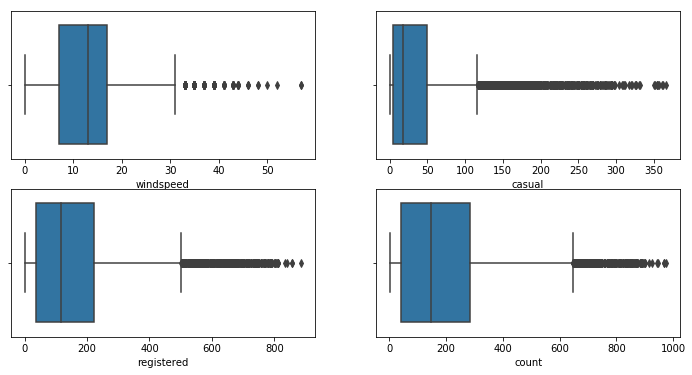

In [7]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,6))
sns.boxplot(x='windspeed',data=df,ax=axes[0][0])
sns.boxplot(x='casual',data=df,ax=axes[0][1])
sns.boxplot(x='registered',data=df,ax=axes[1][0])
sns.boxplot(x='count',data=df,ax=axes[1][1])

The number of leases will be affected by hours, such as the peak period of work, so there will be no abnormal value here.

## 2.3 Data Processing

Firstly, process the date, convert the format of "time and date", and extract the hours, days, months, and years.

In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df.datetime.dt.hour
df['week'] = df.datetime.dt.dayofweek
df['month'] = df.datetime.dt.month
df['year_month'] = df.datetime.dt.strftime('%Y-%m')
df['date'] = df.datetime.dt.date
df.drop('datetime',axis=1,inplace=True)

In [9]:
df

season  holiday  workingday  weather   temp   atemp  humidity  \
0           1        0           0        1   9.84  14.395        81   
1           1        0           0        1   9.02  13.635        80   
2           1        0           0        1   9.02  13.635        80   
3           1        0           0        1   9.84  14.395        75   
4           1        0           0        1   9.84  14.395        75   
...       ...      ...         ...      ...    ...     ...       ...   
10881       4        0           1        1  15.58  19.695        50   
10882       4        0           1        1  14.76  17.425        57   
10883       4        0           1        1  13.94  15.910        61   
10884       4        0           1        1  13.94  17.425        61   
10885       4        0           1        1  13.12  16.665        66   

       windspeed  casual  registered  count  hour  week  month year_month  \
0         0.0000       3          13     16     0     5      1    2011-01   
1         0.0000       8          32     40     1     5      1    2011-01   
2         0.0000       5          27     32     2     5      1    2011-01   
3         0.0000       3          10     13     3     5      1    2011-01   
4         0.0000       0           1      1     4     5      1    2011-01   
...          ...     ...         ...    ...   ...   ...    ...        ...   
10881    26.0027       7         329    336    19     2     12    2012-12   
10882    15.0013      10         231    241    20     2     12    2012-12   
10883    15.0013       4         164    168    21     2     12    2012-12   
10884     6.0032      12         117    129    22     2     12    2012-12   
10885     8.9981       4          84     88    23     2     12    2012-12   

             date  
0      2011-01-01  
1      2011-01-01  
2      2011-01-01  
3      2011-01-01  
4      2011-01-01  
...           ...  
10881  2012-12-19  
10882  2012-12-19  
10883  2012-12-19  
10884  2012-12-19  
10885  2012-12-19  

[10886 rows x 16 columns]

Processing season field

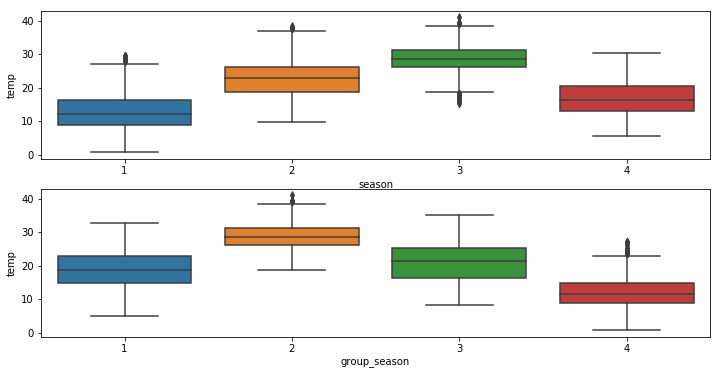

In [10]:
import numpy as np 
df['group_season'] = np.where((df.month <=5) & (df.month >=3), 1, np.where((df.month <=8) & (df.month >=6), 2, np.where((df.month <=11) & (df.month >=9), 3, 4))) 
fig, ax = plt.subplots(2, 1, figsize=(12, 6)) 
# plot 
sns.boxplot(x='season', y='temp',data=df, ax=ax[0]) 
sns.boxplot(x='group_season', y='temp',data=df, ax=ax[1])

The first picture is before the adjustment. In terms of medium numbers, the temperature in the spring is the lowest and the autumn temperature is the highest.

The second picture is after the adjustment. In terms of medium, the temperature in winter is the lowest and the summer temperature is the highest.

Obviously, the results of the second picture are more common in common sense, so delete the other column.

In [11]:
df.drop('season', axis=1, inplace=True) 
df.shape

(10886, 16)

# 3. Feature Analysis

## 3.1 Date and total lease

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


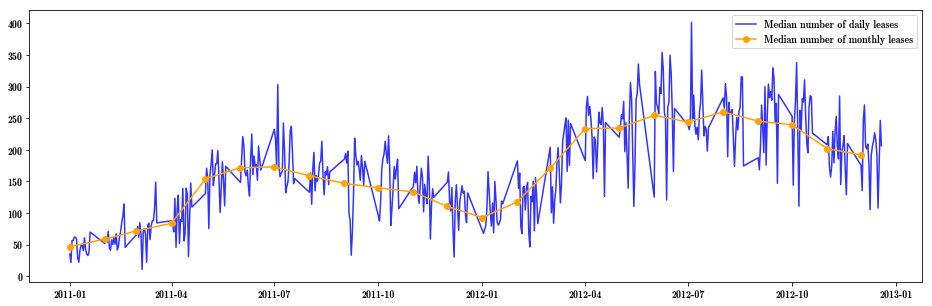

In [12]:
# set font
font = {'family': 'cmb10'} 
matplotlib.rc('font', **font) 
# Calculate the median of dates and months separately
group_date = df.groupby('date')['count'].median() 
group_month = df.groupby('year_month')['count'].median() 
group_month.index = pd.to_datetime(group_month.index) 
plt.figure(figsize=(16,5)) 
plt.plot(group_date.index, group_date.values, '-', color = 'b', label = 'Median number of daily leases', alpha=0.8) 
plt.plot(group_month.index, group_month.values, '-o', color='orange', label = 'Median number of monthly leases') 
plt.legend() 
plt.show()

Compared with 2011, the number of leases increased compared to 2011, and the fluctuation range was similar.

## 3.2 Number of month and total lease

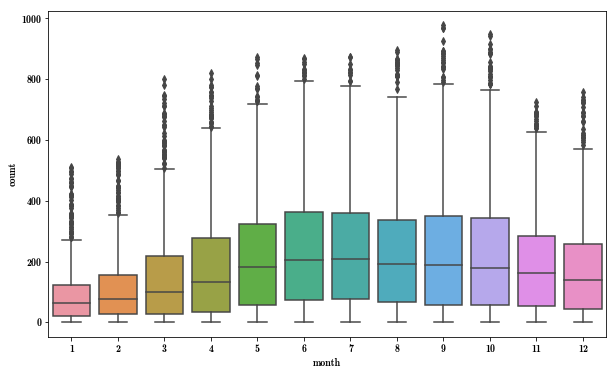

In [13]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='month', y='count', data=df) 
plt.show()

The fluctuation amplitude in the figure above is basically the same, and there are different degrees of departure every month.

## 3.3 Season and total lease number

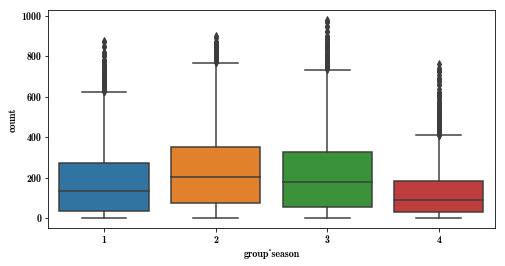

In [14]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='group_season',y='count',data=df)
plt.show()

## 3.4 Day of the week and rental quantity

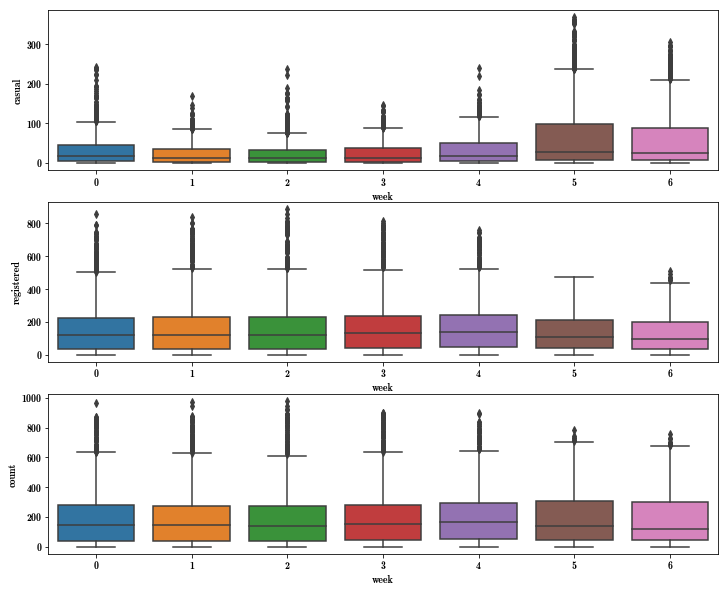

In [15]:
fig,axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 10)) 
sns.boxplot(x='week',y='casual',data=df,ax=axes[0]) 
sns.boxplot(x='week',y='registered', data=df, ax=axes[1]) 
sns.boxplot(x='week',y='count', data=df, ax=axes[2]) 
plt.show()

In terms of median, there are many unregistered users on Saturday and Sunday, while registered users are more weekly, and the corresponding total number is also more during the week, and the total number of groups in the week is more. (0 represents Monday on Monday6 Representative Sunday)

## 3.5 Holidays, working days and total leases

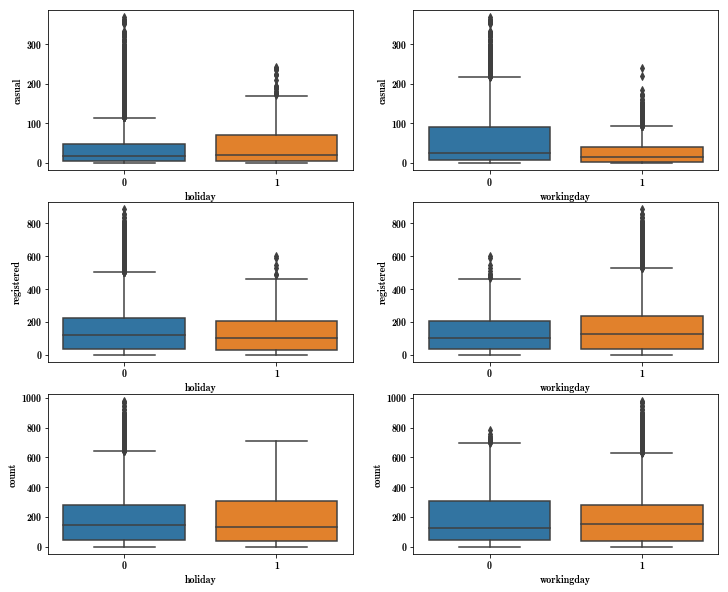

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10)) 
sns.boxplot(x='holiday', y='casual', data=df, ax=axes[0][0]) 
sns.boxplot(x='holiday', y='registered', data=df, ax=axes[1][0]) 
sns.boxplot(x='holiday', y='count', data=df, ax=axes[2][0]) 
sns.boxplot(x='workingday', y='casual', data=df, ax=axes[0][1]) 
sns.boxplot(x='workingday', y='registered', data=df, ax=axes[1][1]) 
sns.boxplot(x='workingday', y='count', data=df, ax=axes[2][1]) 
plt.show()

Unregistered users: There are many on holidays, less on working days

Registered users: less on holidays, more on working days

In general, there are fewer holiday leasing, and there are more leases on working days. Preliminary speculation is that most unregistered users rent bicycles for non -working days, while most registered users are used for work or school on working days.

## 3.6 The relationship between hours and total leasing

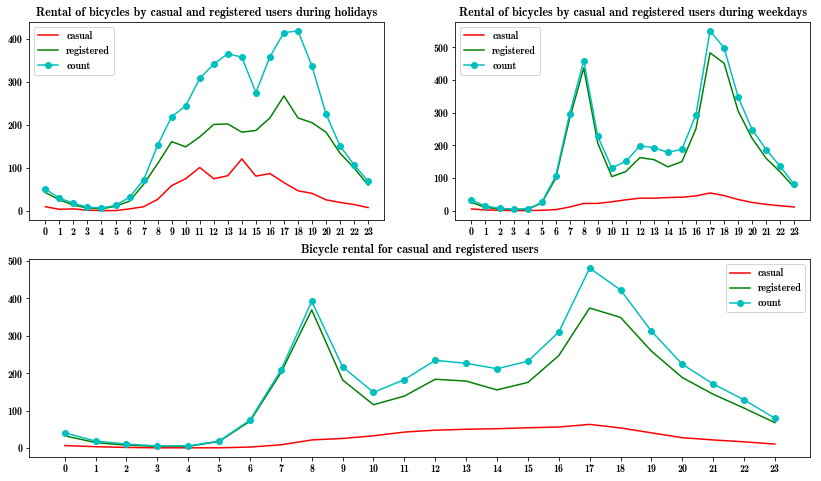

In [17]:
plt.figure(1, figsize=(14, 8))
plt.subplot(221)
hour_casual = df[df.holiday==1].groupby('hour')['casual'].median()
hour_registered = df[df.holiday==1].groupby('hour')['registered'].median()
hour_count = df[df.holiday==1].groupby('hour')['count'].median()
plt.plot(hour_casual.index, hour_casual.values, '-', color='r', label='casual')
plt.plot(hour_registered.index, hour_registered.values, '-', color='g', label='registered')
plt.plot(hour_count.index, hour_count.values, '-o', color='c', label='count')
plt.legend()
plt.xticks(hour_casual.index)
plt.title('Rental of bicycles by casual and registered users during holidays')
# plot the second picture
plt.subplot(222)
hour_casual = df[df.workingday==1].groupby('hour')['casual'].median()
hour_registered = df[df.workingday==1].groupby('hour')['registered'].median()
hour_count = df[df.workingday==1].groupby('hour')['count'].median()
plt.plot(hour_casual.index, hour_casual.values, '-', color='r', label='casual')
plt.plot(hour_registered.index, hour_registered.values, '-', color='g', label='registered')
plt.plot(hour_count.index, hour_count.values, '-o', color='c', label='count')
plt.legend()
plt.title('Rental of bicycles by casual and registered users during weekdays')
plt.xticks(hour_casual.index)
# plot the third picture
plt.subplot(212)
hour_casual = df.groupby('hour')['casual'].median()
hour_registered = df.groupby('hour')['registered'].median()
hour_count = df.groupby('hour')['count'].median()
plt.plot(hour_casual.index, hour_casual.values, '-', color='r', label='casual')
plt.plot(hour_registered.index, hour_registered.values, '-', color='g', label='registered')
plt.plot(hour_count.index, hour_count.values, '-o', color='c', label='count')
plt.legend()
plt.title('Bicycle rental for casual and registered users')
plt.xticks(hour_casual.index)
plt.show()


## 3.5 The relationship between weather and total leasing

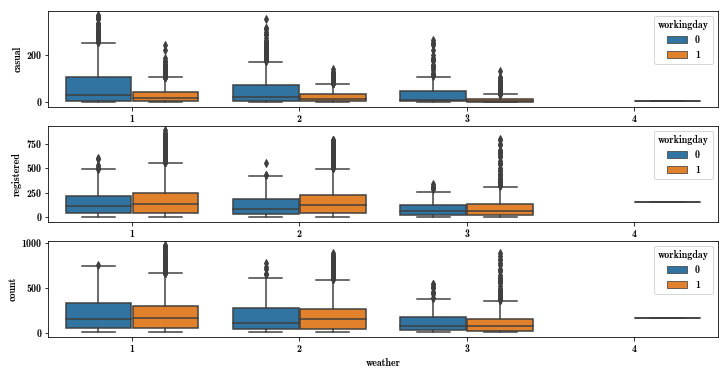

In [18]:
fig, ax = plt.subplots(3, 1, figsize=(12, 6)) 
sns.boxplot(x='weather', y='casual', hue='workingday',data=df, ax=ax[0]) 
sns.boxplot(x='weather', y='registered',hue='workingday', data=df, ax=ax[1]) 
sns.boxplot(x='weather', y='count',hue='workingday', data=df, ax=ax[2])

## 3.6 The relationship between other variables and total lease quantity

Here I use Seaborn's Pairplot to draw the remaining temperature, somatosensory temperature, relative humidity, wind speed, wind speed, and the relationship between unregistered users and registered users.

In [19]:
df

holiday  workingday  weather   temp   atemp  humidity  windspeed  \
0            0           0        1   9.84  14.395        81     0.0000   
1            0           0        1   9.02  13.635        80     0.0000   
2            0           0        1   9.02  13.635        80     0.0000   
3            0           0        1   9.84  14.395        75     0.0000   
4            0           0        1   9.84  14.395        75     0.0000   
...        ...         ...      ...    ...     ...       ...        ...   
10881        0           1        1  15.58  19.695        50    26.0027   
10882        0           1        1  14.76  17.425        57    15.0013   
10883        0           1        1  13.94  15.910        61    15.0013   
10884        0           1        1  13.94  17.425        61     6.0032   
10885        0           1        1  13.12  16.665        66     8.9981   

       casual  registered  count  hour  week  month year_month        date  \
0           3          13     16     0     5      1    2011-01  2011-01-01   
1           8          32     40     1     5      1    2011-01  2011-01-01   
2           5          27     32     2     5      1    2011-01  2011-01-01   
3           3          10     13     3     5      1    2011-01  2011-01-01   
4           0           1      1     4     5      1    2011-01  2011-01-01   
...       ...         ...    ...   ...   ...    ...        ...         ...   
10881       7         329    336    19     2     12    2012-12  2012-12-19   
10882      10         231    241    20     2     12    2012-12  2012-12-19   
10883       4         164    168    21     2     12    2012-12  2012-12-19   
10884      12         117    129    22     2     12    2012-12  2012-12-19   
10885       4          84     88    23     2     12    2012-12  2012-12-19   

       group_season  
0                 4  
1                 4  
2                 4  
3                 4  
4                 4  
...             ...  
10881             4  
10882             4  
10883             4  
10884             4  
10885             4  

[10886 rows x 16 columns]

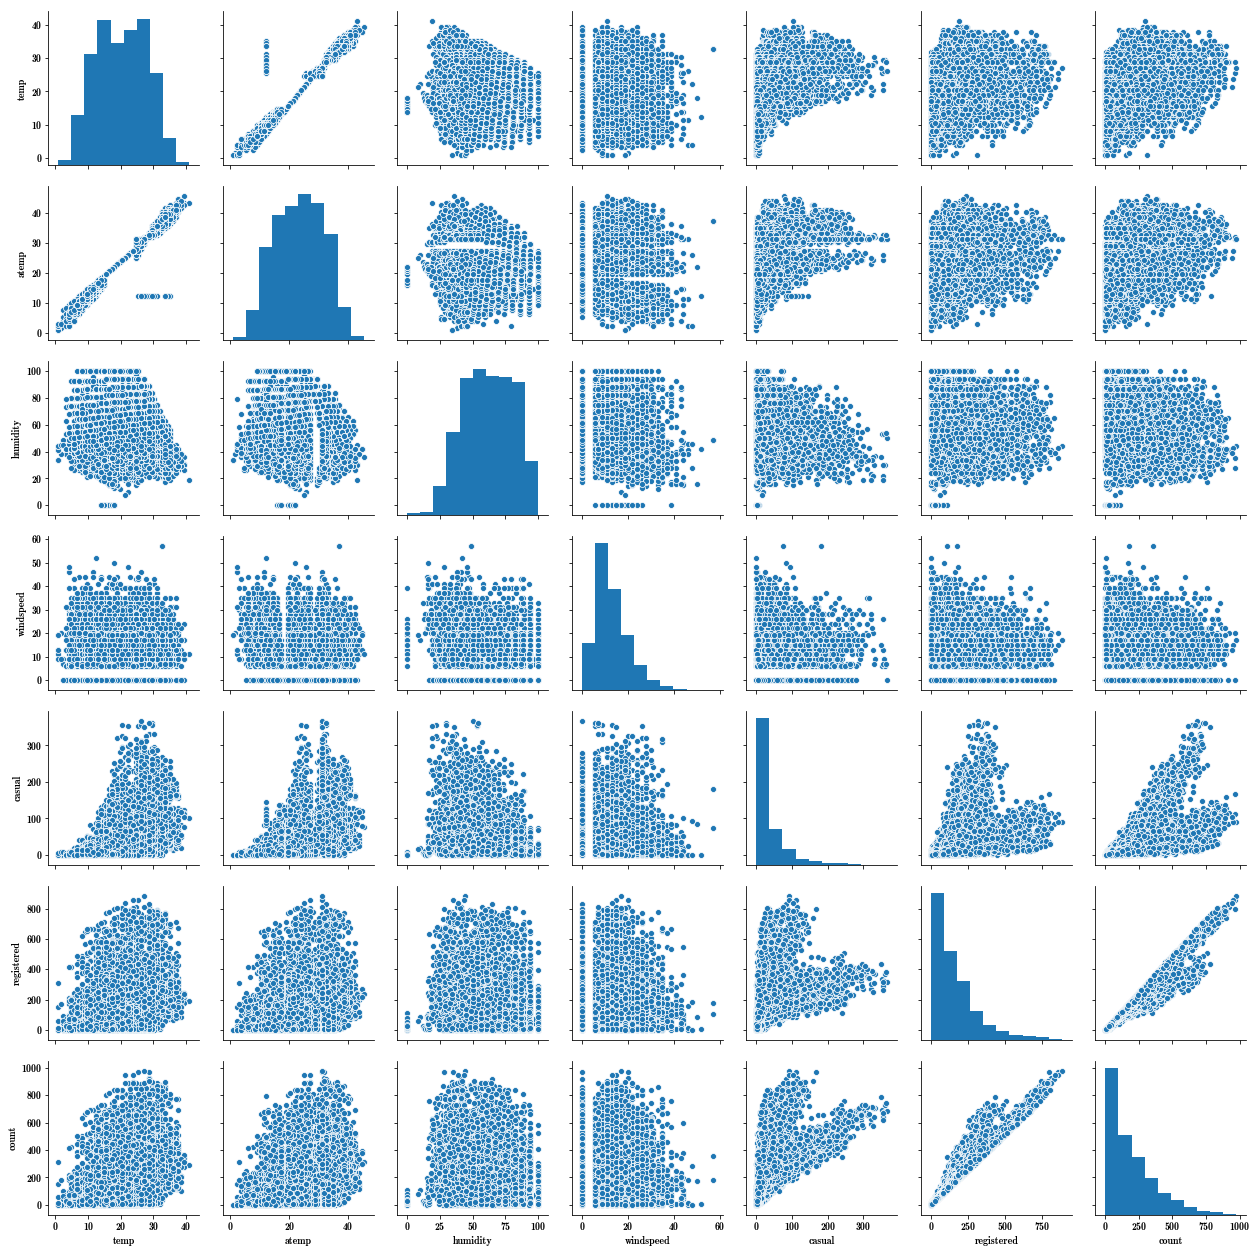

In [20]:
sns.pairplot(df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])

In order to facilitate the overall situation, I narrow the size of the picture, as shown in the figure below. The vertical axis is temperature, physical temperature, relative humidity, wind speed, unregistered users, all users, all users, the horizontal axis from left to rightThe same order.

After the number transformation, the number of rental and the normal state of the registered user is still large, so when calculating the number of phase relationships, select the Spearman correlation coefficient.

It can be seen from the figure that the temperature and body sensing temperature are positively correlated with unregistered users, registered users, and all users, while relative humidity and wind speed are correlated with a certain degree. In addition, other variables between other variables.There are also to varying degrees of correlation.

In addition, there are obvious gaps in the middle of the scattered point. You need to take this one to see.

In [21]:
df['windspeed']

0         0.0000
1         0.0000
2         0.0000
3         0.0000
4         0.0000
          ...   
10881    26.0027
10882    15.0013
10883    15.0013
10884     6.0032
10885     8.9981
Name: windspeed, Length: 10886, dtype: float64

The wind speed is 0, which is obviously unreasonable. It treats it as a missing value. I choose to fill it back.

In [22]:
df.loc[df.windspeed == 0, 'windspeed'] = np.nan 
df.fillna(method='bfill', inplace=True) 
df.windspeed.isnull().sum()

0

## 3.7 correlation matrix

1. Because multiple variables are not satisfied with the normal distribution, the number changes to it.

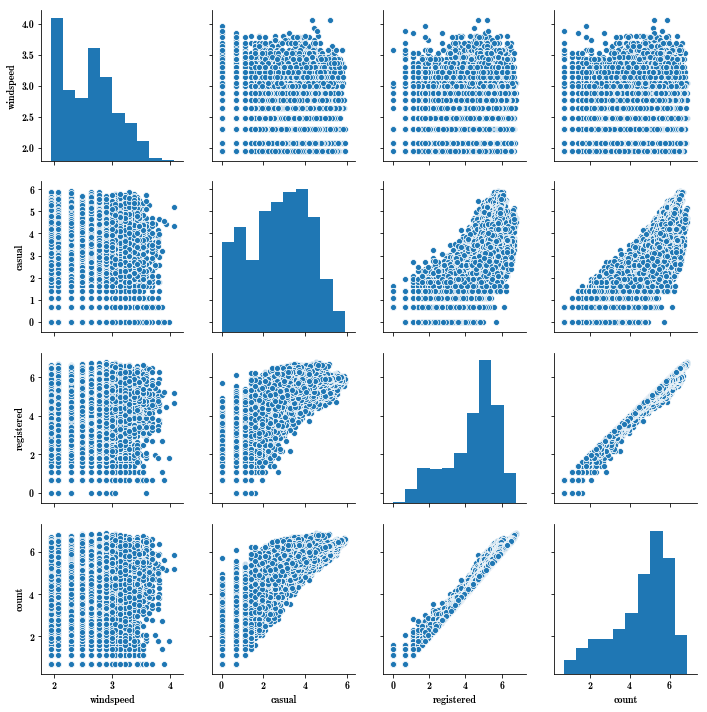

In [23]:
# Logarithmic conversion
df['windspeed'] = np.log(df['windspeed'].apply(lambda x: x+1)) 
df['casual'] = np.log(df['casual'].apply(lambda x: x+1)) 
df['registered'] = np.log(df['registered'].apply(lambda x: x+1)) 
df['count'] = np.log(df['count'].apply(lambda x: x+1)) 
sns.pairplot(df[['windspeed', 'casual', 'registered', 'count']])

After the number transformation, the number of rental and the normal state of the registered user is still large, so when calculating the number of phase relationships, select the Spearman correlation coefficient.

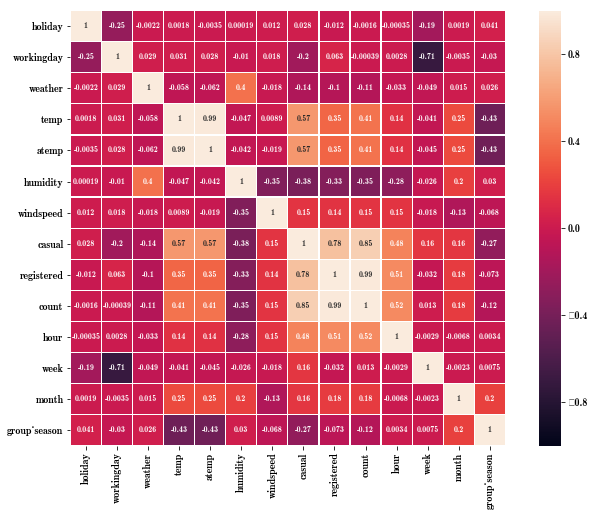

In [24]:
correlation = df.corr(method='spearman') 
plt.figure(figsize=(12, 8)) 
# Draw the heat map 
sns.heatmap(correlation, linewidths=0.2, vmax=1, vmin=-1, linecolor='w', annot=True,annot_kws={'size':8},square=True)

# 4.Regression Model

## 4.1 Ridge

### 4.1.1 Split dataset

Since the number of all users is formed by the addition of unregistered users and registered users, delete

In [25]:
df.drop(['casual','registered'],axis=1,inplace=True)

In [26]:
X = df.drop(['count','year_month','date'],axis=1)
y = df['count']

Divide training and testing sets

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

### 4.1.2 Model training

1. The alpha here refers to the regularization parameter, which is initially set to 1

In [28]:
rd = Ridge(alpha=1)
rd.fit(X_train, y_train)
print(rd.coef_)
print(rd.intercept_)

[ 0.00770067 -0.00034301  0.0039196   0.00818243  0.03635549 -0.01558927
  0.09080788  0.0971406   0.02791812  0.06114358 -0.00099811]
2.6840271343740683


As we know from the previous section, the regularization parameter has a significant impact on the results. The next step is to use ridge plot to select the regularization parameter

/opt/conda/lib/python3.6/site-packages/matplotlib/mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
  MathTextWarning)


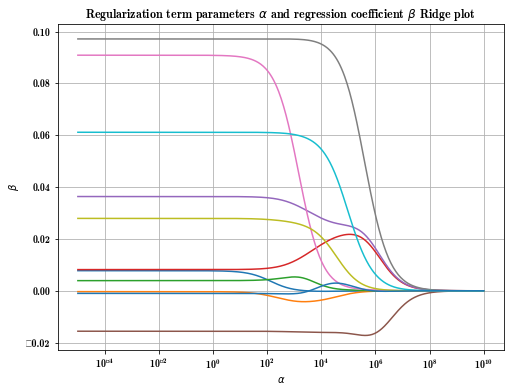

In [29]:
# Set parameters and train the model
alphas = 10**np.linspace(-5, 10, 500)
betas = []
for alpha in alphas:
    rd = Ridge(alpha = alpha)
    rd.fit(X_train, y_train)
    betas.append(rd.coef_)
# Draw the Ridge Map
plt.figure(figsize=(8,6))
plt.plot(alphas, betas)
# Perform logarithmic transformation on data for easy observation
plt.xscale('log')
# Add grid line
plt.grid(True)
# Coordinate axis adaptation data volume
plt.axis('tight')
plt.title(r'Regularization term parameters $\alpha$ and regression coefficient $\beta$ Ridge plot')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.show()

Because it is observed through the naked eye, it is not necessarily the best. It is used in another way: the reunion of the cross-verification of the verification.

In [30]:
rd_cv = RidgeCV(alphas=alphas, cv=10, scoring='r2')
rd_cv.fit(X_train, y_train)
rd_cv.alpha_

805.0291812295973

The best regularization item parameter selected at the end is 805.03, and then use this parameter for model training

In [31]:
rd = Ridge(alpha=805.0291812295973) #, fit_intercept=False
rd.fit(X_train, y_train)
print(rd.coef_)
print(rd.intercept_)

[ 0.00074612 -0.00382265  0.00532093  0.01100823  0.03375475 -0.01582157
  0.0584206   0.09708992  0.02639369  0.0604242  -0.00116086]
2.7977274604845803


## 4.1.3 Model Prediction

In [32]:
# Predict training and testing data separately
ridge_y_train_pred = rd.predict(X_train)
ridge_y_test_pred = rd.predict(X_test)
# Calculate their root mean square error and goodness of fit separately
ridge_y_train_rmse = sqrt(metrics.mean_squared_error(y_train, ridge_y_train_pred))
ridge_y_train_score = rd.score(X_train, y_train)
ridge_y_test_rmse = sqrt(metrics.mean_squared_error(y_test, ridge_y_test_pred))
ridge_y_test_score = rd.score(X_test, y_test)
print('Training set RMSE: {0}, score: {1}'.format(ridge_y_train_rmse, ridge_y_train_score))
print('Test set RMSE: {0}, score: {1}'.format(ridge_y_test_rmse, ridge_y_test_score))

Training set RMSE: 1.0348076524200298, score: 0.46691272323469246
Test set RMSE: 1.0508046977499312, score: 0.45801571689420717


## 4.2 Lasso

/opt/conda/lib/python3.6/site-packages/matplotlib/mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
  MathTextWarning)


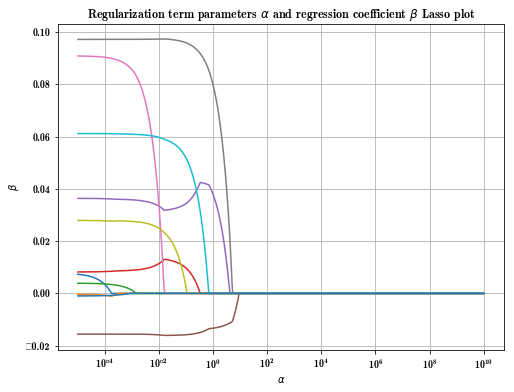

In [33]:
alphas = 10**np.linspace(-5, 10, 500)
betas = []
for alpha in alphas:
    Las = Lasso(alpha = alpha)
    Las.fit(X_train, y_train)
    betas.append(Las.coef_)
plt.figure(figsize=(8,6))
plt.plot(alphas, betas)
plt.xscale('log')
plt.grid(True)
plt.axis('tight')
plt.title(r'Regularization term parameters $\alpha$ and regression coefficient $\beta$ Lasso plot')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.show()

Through the Lasso regression curve, it can be seen that all variables near 10 tend to stabilize

Using cross validation to select the optimal regularization parameter for Lasso regression

In [34]:
Las_cv = LassoCV(alphas=alphas, cv=10)
Las_cv.fit(X_train, y_train)
Las_cv.alpha_

0.005074705239490466

Use this parameter to retrain the model

In [35]:
Las = Lasso(alpha=0.005074705239490466)
Las.fit(X_train, y_train)
print(Las.coef_)
print(Las.intercept_)

[ 0.         -0.          0.          0.01001827  0.03467474 -0.01570339
  0.06202352  0.09721864  0.02632133  0.06032038 -0.        ]
2.780830398244292


Compared with the return of Ridge, you can find that there are 0 existence in the regression coefficient here, that is, the four independent variables of Holiday, WorkingDay, Weather, and Group_Season.

In [36]:
# Use Lasso to predict training sets and test sets, and calculate the equal root error and fitting advantages
lasso_y_train_pred = Las.predict(X_train)
lasso_y_test_pred = Las.predict(X_test)
lasso_y_train_rmse = sqrt(metrics.mean_squared_error(y_train, lasso_y_train_pred))
lasso_y_train_score = Las.score(X_train, y_train)
lasso_y_test_rmse = sqrt(metrics.mean_squared_error(y_test, lasso_y_test_pred))
lasso_y_test_score = Las.score(X_test, y_test)
print('Training set RMSE: {0}, score: {1}'.format(lasso_y_train_rmse, lasso_y_train_score))
print('Test set RMSE: {0}, score: {1}'.format(lasso_y_test_rmse, lasso_y_test_score))

Training set RMSE: 1.0347988070045209, score: 0.4669218367318746
Test set RMSE: 1.050818996520012, score: 0.45800096674816204


## 4.3 linear regression

* Finally, use traditional linear regression to predict, so as to compare the differences between the three.

In [37]:
# Training linear regression model
LR = LinearRegression()
LR.fit(X_train, y_train)
print(LR.coef_)
print(LR.intercept_)

[ 0.00775915 -0.00032048  0.00391537  0.00817703  0.03636054 -0.01558878
  0.09087069  0.09714058  0.02792397  0.06114454 -0.00099731]
2.6837869701964037


In [38]:
# Predict the training and testing sets separately, and calculate the root mean square error and goodness of fit
lr_y_train_pred = LR.predict(X_train)
lr_y_test_pred = LR.predict(X_test)
lr_y_train_rmse = sqrt(metrics.mean_squared_error(y_train, lr_y_train_pred))
lr_y_train_score = LR.score(X_train, y_train)
lr_y_test_rmse = sqrt(metrics.mean_squared_error(y_test, lr_y_test_pred))
lr_y_test_score = LR.score(X_test, y_test)
print('Training set RMSE: {0}, score: {1}'.format(lr_y_train_rmse, lr_y_train_score))
print('Test set RMSE: {0}, score: {1}'.format(lr_y_test_rmse, lr_y_test_score))

Training set RMSE: 1.0347173340121176, score: 0.46700577529675036
Test set RMSE: 1.0510323073614725, score: 0.45778089839236125


## 4.4 Elastic Net

In [39]:
Els_cv = ElasticNetCV(alphas=alphas, cv=10)
Els_cv.fit(X_train, y_train)
Els_cv.alpha_

0.009461323755890769

In [40]:
Els = ElasticNet(alpha=0.009461323755890769)
Els.fit(X_train, y_train)
print(Els.coef_)
print(Els.intercept_)

[ 0.         -0.          0.          0.0100756   0.03462637 -0.01570219
  0.06227413  0.09721359  0.02637802  0.0603261  -0.        ]
2.7799397737065235


In [41]:
# Use ElasticNet to predict the training set and test set, and calculate the balance of the uniform root error and the fitting advantages
els_y_train_pred = Els.predict(X_train)
els_y_test_pred = Els.predict(X_test)
els_y_train_rmse = sqrt(metrics.mean_squared_error(y_train, els_y_train_pred))
els_y_train_score = Els.score(X_train, y_train)
els_y_test_rmse = sqrt(metrics.mean_squared_error(y_test, els_y_test_pred))
els_y_test_score = Els.score(X_test, y_test)
print('Training set RMSE: {0}, score: {1}'.format(els_y_train_rmse, els_y_train_score))
print('Test set RMSE: {0}, score: {1}'.format(els_y_test_rmse, els_y_test_score))

Training set RMSE: 1.0347973056394495, score: 0.46692338359170604
Test set RMSE: 1.0508238633371485, score: 0.45799594625214857


## 4.5 Adaptive Lasso

Use the Alpha value given by Lassocv to the Adaptive Lasso

In [42]:
def Adaptive_LASSO(X_train,y_train,max_iterations = 1000,lasso_iterations = 10, alpha = 0.005074705239490466, tol = 0.001, max_error_up = 5, title = ''):
    
    # set checks
    higher  = float('inf')
    lower   = 0
    
    # set lists
    coefficients_list = []
    iterations_list   = []
    
    # set variables
    X_train  = X_train
    y_train  = y_train
    
    # set constants
    alpha    = alpha
    tol      = tol
    max_iter = max_iterations
    n_lasso_iterations = lasso_iterations
    
    g = lambda w: np.sqrt(np.abs(w))
    gprime = lambda w: 1. / (2. * np.sqrt(np.abs(w)) + np.finfo(float).eps)

    n_samples, n_features = X_train.shape
    p_obj = lambda w: 1. / (2 * n_samples) * np.sum((y_train - np.dot(X_train, w)) ** 2) \
                      + alpha * np.sum(g(w))

    weights = np.ones(n_features)
    X_w = X_train / weights[np.newaxis, :]
    X_w  = np.nan_to_num(X_w)
    X_w  = np.round(X_w,decimals = 3)

    y_train    = np.nan_to_num(y_train)

    adaptive_lasso = Lasso(alpha=alpha, fit_intercept=True)

    adaptive_lasso.fit(X_w, y_train)

    for k in range(n_lasso_iterations):
        X_w = X_train / weights[np.newaxis, :]
        adaptive_lasso = Lasso(alpha=alpha, fit_intercept=True)
        adaptive_lasso.fit(X_w, y_train)
        coef_ = adaptive_lasso.coef_ / weights
        weights = gprime(coef_)
        
        print ('Iteration #',k+1,':   ',p_obj(coef_))  # should go down
        
        iterations_list.append(k)
        coefficients_list.append(p_obj(coef_))
        
    print (np.mean((adaptive_lasso.coef_ != 0.0) == (coef_ != 0.0)))   
    
    coef = pd.Series(adaptive_lasso.coef_, index = X_train.columns)
    print('=============================================================================')
    print("Adaptive LASSO picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables.")
    print('=============================================================================')
    print("Coefficient：",adaptive_lasso.coef_)
    print("Intercept：",adaptive_lasso.intercept_)
    plt.rcParams["figure.figsize"] = (18,8)

    # subplot of the predicted vs. actual

    plt.plot(iterations_list,coefficients_list,color = 'orange')
    plt.scatter(iterations_list,coefficients_list,color = 'green')
    plt.title('Iterations vs. p_obj(coef_)')
    plt.show()

    # plot of the coefficients'

    imp_coef = pd.concat([coef.sort_values().tail(10),])#,coef.sort_values().tail(10)
    imp_coef.plot(kind = "barh", color = 'green',fontsize=14)
    plt.title("Top 10 Coefficients Selected by the Adaptive LASSO Model", fontsize = 14)
    plt.show()
    return adaptive_lasso

Iteration # 1 :    4.408917757389263
Iteration # 2 :    4.653287007964163
Iteration # 3 :    4.779198289803339
Iteration # 4 :    4.974459072802686
Iteration # 5 :    4.97484692235236
Iteration # 6 :    4.9748633794618975
Iteration # 7 :    4.974864841092999
Iteration # 8 :    4.974864974015832
Iteration # 9 :    4.9748649861100045
Iteration # 10 :    4.9748649872104185
1.0
Adaptive LASSO picked 5 variables and eliminated the other 6 variables.
Coefficient： [ 0.         -0.          0.          0.          0.1043183  -0.06362913
  0.          0.15613827  0.0757625   0.12194196 -0.        ]
Intercept： 2.9776876125153664


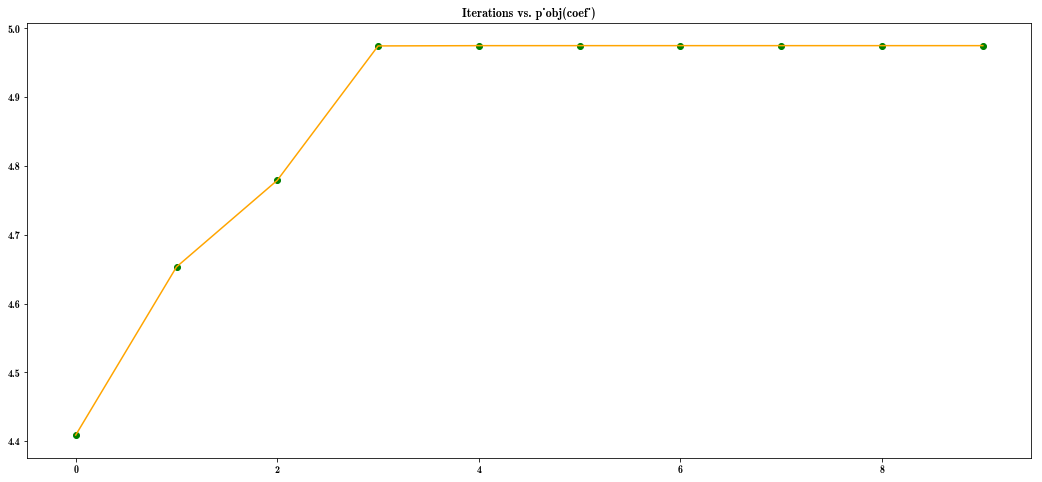

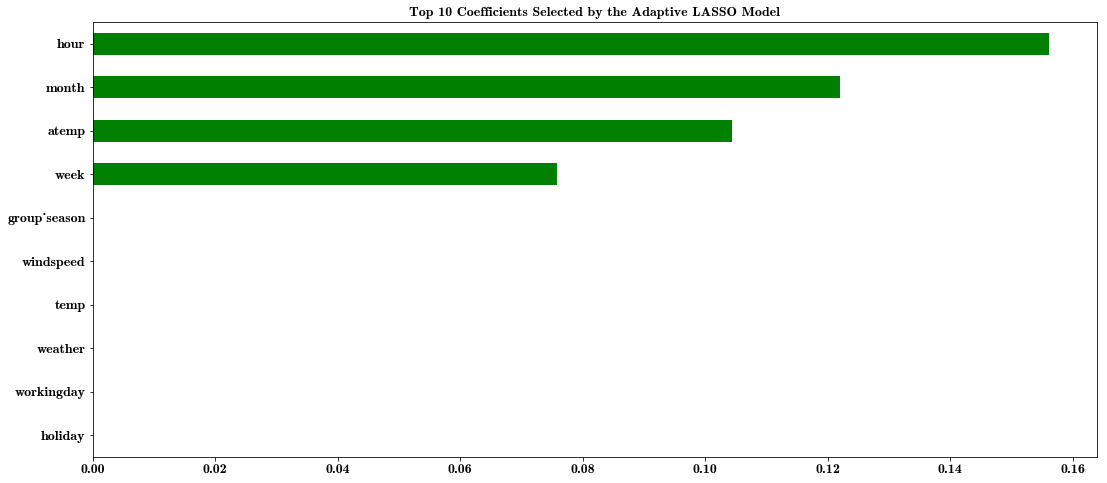

In [43]:
# variable selection with LASSO for the model
model = Adaptive_LASSO(X_train,
                       y_train,
                       max_iterations = 5000,
                       lasso_iterations = 10, 
                       alpha = 0.005074705239490466, 
                       tol = 0.001, 
                       max_error_up = 5, 
                       title = '')

In [44]:
# look at the coefficients in the model
coef = pd.Series(model.coef_, index = X_train.columns)
coef = pd.DataFrame(coef).reset_index()
coef_list = coef.loc[coef[0]!= 0.0]['index'].to_list()
new_X_train = X_train[coef_list]
ada_intercept = model.intercept_

In [45]:
coef_list

['atemp', 'humidity', 'hour', 'week', 'month']

In [46]:
ada_y_test_pred = np.dot(np.array(X_test),np.array(coef[0]))+ada_intercept 

In [47]:
ada_y_train_pred = np.dot(np.array(X_train),np.array(coef[0]))+ada_intercept 

In [48]:
ada_y_train_pred

array([2.77375634, 3.59010865, 2.29210956, ..., 0.45370251, 4.33474824,
       0.77827768])

In [49]:
ada_y_train_score =  ((y_train - ada_y_train_pred)**2).sum()/((y_train - y_train.mean())**2).sum() -1

In [50]:
ada_y_train_score

0.35343635777520443

In [51]:
ada_y_test_score =  ((y_test - ada_y_test_pred)**2).sum()/((y_test - y_test.mean())**2).sum() -1

In [52]:
ada_y_test_score

0.42138157773200846

In [53]:
# Use Adaptive Lasso to predict the training and testing sets separately, and calculate the root mean square error and goodness of fit
ada_y_train_rmse = sqrt(metrics.mean_squared_error(y_train, ada_y_train_pred))
ada_y_test_rmse = sqrt(metrics.mean_squared_error(y_test, ada_y_test_pred))
print('Training set RMSE: {0}, score: {1}'.format(ada_y_train_rmse, ada_y_train_score))
print('Test set RMSE: {0}, score: {1}'.format(ada_y_test_rmse, ada_y_test_score))

Training set RMSE: 1.6488433326718732, score: 0.35343635777520443
Test set RMSE: 1.7017039247458843, score: 0.42138157773200846


# 5. Conclusion

In terms of the difference in root mean square error between the test set and the training set, linear regression is the largest, ridge regression is the smallest, and regression has the highest goodness of fit on the test set. Overall, ridge regression performs slightly better on this dataset


In terms of this rating, the above models are not very good and other models need to be learned, such as decision trees, random forests, neural networks, etc